In [36]:
from random import randint,sample
import sys
import matplotlib.pyplot as plt
import numpy as np
import time 
import math
import random
import string
import copy
sys.setrecursionlimit(10**9)
plt.rcParams['figure.figsize'] = (10.0, 6.0)

In [27]:
class Node:
    def __init__(self,surname,firstname,index):
        self.surname = surname
        self.firstname = firstname
        self.index = index
        self.next_node = None

        
class SortedList:
    def __init__(self):
        self.next_node = None
    def add(self,element):
        new_node = Node(element[0],element[1],element[2])
        if not self.next_node:
            self.next_node = new_node
            return
        node = self
        while(node.next_node and node.next_node.index < new_node.index):
            node = node.next_node
        temp_node = node.next_node
        node.next_node = new_node
        new_node.next_node = temp_node
    
    def get(self,index):
        node = self.next_node
        while(node and node.index < index):
            node = node.next_node
        if(node and node.index == index):
            return node
        else:
            return None
    def delete(self,index):
        node = self
        while(node.next_node and node.next_node.index < index):
            node = node.next_node
        if(node.next_node and node.next_node.index == index):
            temp = node.next_node
            node.next_node = node.next_node.next_node#
            del(temp)
        else:
            raise BaseException("Element not found")
    def print_all(self):
        node = self.next_node
        while(node):
            print(node.surname+" "+node.firstname+" "+str(node.index))
            node = node.next_node
        

In [28]:
class TreeNode:
    def __init__(self,surname, firstname, index,left,right):
        self.left=left
        self.right=right
        self.surname = surname
        self.firstname = firstname
        self.index = index
    def print_me(self,level):
        print('-'.join(["-" for i in range(level)])+self.surname+self.firstname+str(self.index))
        if self.left:
            print('-'.join(["-" for i in range(level)])+'left')
            self.left.print_me(level+1)
        if self.right:
            print('-'.join(["-" for i in range(level)])+'right')
            self.right.print_me(level+1)
    def count(self):
        suma = 0
        if self.left:
            suma+=self.left.count()
        if self.right:
            suma+=self.right.count()
        return suma+1
    def delete(self,index):
        if self.index == index:
            if self.left and self.right:
                next_node = self.find_smallest(self.right)
                self.index = next_node.index
                self.surname = next_node.surname
                self.firstname = next_node.surname
            elif self.left:
                return self.left
            elif self.right:
                return self.right
            else:
                return None
        elif index < self.index:
            if not self.left:
                raise BaseException("Index not found")
            self.left = self.left.delete(index)
        else:
            if not self.right:
                raise BaseException("Index not found")
            self.right = self.right.delete(index)
        return self
    def find_smallest(self,node):
        parent =self
        child = node
        if not node.left:
            parent.right = node.right
            return node
        while node.left:
            parent = node
            node =node.left
        parent.left = node.right
        return node

class Tree:
    def __init__(self):
        self.root = None
    def add(self,element):
        new_node = TreeNode(element[0],element[1],element[2],None,None);
        if not self.root:
            self.root = new_node
            return
        cur_node = self.root
        while True:
            if new_node.index < cur_node.index:
                if cur_node.left:
                    cur_node=cur_node.left
                else:
                    cur_node.left = new_node
                    break
            else:
                if cur_node.right:
                    cur_node = cur_node.right                
                else:
                    cur_node.right = new_node
                    break
    def get(self,index):
        cur_node = self.root
        while cur_node:
            if index < cur_node.index:
                cur_node = cur_node.left
            elif index > cur_node.index:
                cur_node = cur_node.right
            else:
                return cur_node
        raise BaseException("No node with this id")
    def delete(self,index):
        self.root=self.root.delete(index)


    def get_min_node(self,node):
        parent = node
        while parent.left and parent.left.left:
            parent = parent.left
        if parent.left:
            temp = parent.left
            parent.left = None
            return temp
        return parent
        
    def print_all(self):
        if self.root:
            self.root.print_me(0)
        else:
            print("Empty tree")
    def count(self):
        if not self.root:
            return 0
        return self.root.count()
        

In [29]:
def prepare_student(idx):
    return [''.join([random.choice(string.ascii_letters) for _ in range(12)]),''.join([random.choice(string.ascii_letters) for _ in range(12)]),idx]

def prepare_students(amount):
    return [prepare_student(idx) for idx in range(1000000,1000000+amount)]

def prepare_test_dataset(maximum,jump=1):
    X = [amount for amount in range(1,maximum,jump)]
    Y = [prepare_students(amount) for amount in X]
    return X,Y

In [1]:
def measure_time(students,store):
    s_copy = students.copy()
    random.shuffle(s_copy)
    start = time.time()
    for s in s_copy:
        store.add(s)
    add_time = (time.time() - start)/len(s_copy)
    random.shuffle(s_copy)
    start = time.time()
    for s in s_copy:
        store.get(s[2])
    get_time = (time.time() - start)/len(s_copy)
    random.shuffle(s_copy)
    start = time.time()
    for s in s_copy:
        store.delete(s[2])
    delete_time = time.time() - start
    return add_time,get_time,delete_time

In [2]:
def perform_test_single_store(store,X,Y):
    adds,gets,deletes=[],[],[]
    for y in Y:
        add,get,delete = measure_time(y,store)
        adds.append(add)
        gets.append(get)
        deletes.append(delete)
    return adds,gets,deletes

def plot_plot(X,Ys,labels,title):
    for i in range(len(Ys)):
        plt.plot(X,Ys[i],label=labels[i])
    plt.legend()
    plt.xlabel('Number of Elements')
    plt.ylabel('Time (s)')
    plt.title(title)
    plt.show()
    
    
def perform_test(stores,X,Y,labels):
    adds,gets,deletes =[],[],[]
    for store in stores:
        add,get,delete = perform_test_single_store(store,X,Y)
        adds.append(add)
        gets.append(get)
        deletes.append(delete)
    plot_plot(X,adds,labels,"Addition time")
    plot_plot(X,gets,labels,"Finding time")
    plot_plot(X,deletes,labels,"Deletion time")

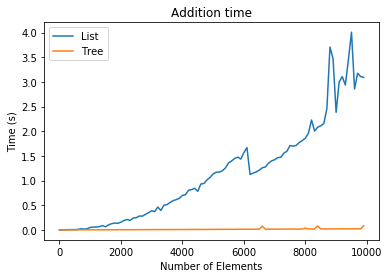

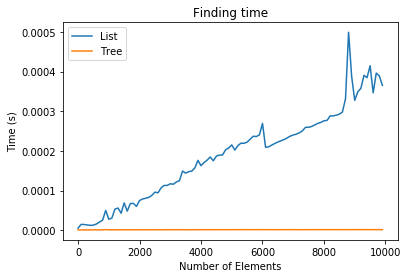

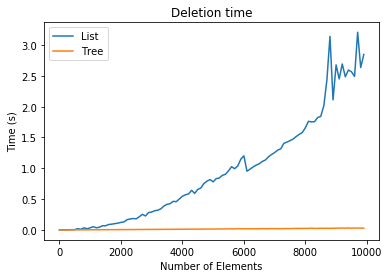

In [9]:
X,Y = prepare_test_dataset(40002,2000)
perform_test([SortedList(), Tree()],X,Y,["List","Tree"])

In [109]:
class AVLNode:
    def __init__(self,surname, firstname, index,left,right):
        self.left=left
        self.right=right
        self.surname = surname
        self.firstname = firstname
        self.index = index
        self.height = 1
    def print_me(self,level):
        print('-'.join(["-" for i in range(level)])+self.surname+self.firstname+str(self.index))
        if self.left:
            print('-'.join(["-" for i in range(level)])+'left')
            self.left.print_me(level+1)
        if self.right:
            print('-'.join(["-" for i in range(level)])+'right')
            self.right.print_me(level+1)

class AVLTree:
    def __init__(self):
        self.root = None
    def add(self,element):
        new_node = AVLNode(element[0],element[1],element[2],None,None);
        self.root = self.add_recursive(self.root,new_node)
        
    def add_recursive(self,root,new_node):
        if not root:
            return new_node
        if new_node.index < root.index:
            root.left = self.add_recursive(root.left,new_node)
        else:
            root.right = self.add_recursive(root.right,new_node)
        
        root.height = 1 + max(self.calculate_height(root.left),self.calculate_height(root.right))
        balance = self.calculate_balance(root)
        
        if balance > 1 and new_node.index  < root.left.index:
            return self.rotate_right(root)
        if balance < -1 and new_node.index > root.right.index:
            return self.rotate_left(root)
        if balance > 1 and new_node.index > root.left.index:
            root.left = self.rotate_left(root.left)
            return self.rotate_right(root)
        if balance < -1 and new_node.index < root.right.index:
            root.right = self.rotate_right(root.right)
            return self.rotate_left(root)
        return root
        
    def rotate_left(self,node):
        node2 = node.right
        temp = node2.left
        node2.left = node
        node.right = temp
        
        node.height = 1 + max(self.calculate_height(node.left),self.calculate_height(node.right))
        node2.height = 1 + max(self.calculate_height(node2.left),self.calculate_height(node2.right))
        return node2
    
    def rotate_right(self,node):
        node2 = node.left
        temp = node2.right
        node2.right = node
        node.left = temp
        
        node.height = 1 + max(self.calculate_height(node.left),self.calculate_height(node.right))
        node2.height = 1 + max(self.calculate_height(node2.left),self.calculate_height(node2.right))
        return node2
        
        
    def calculate_balance(self,node):
        if not node:
            return 0
        return self.calculate_height(node.left)-self.calculate_height(node.right)
    def calculate_height(self,node):
        if not node:
            return 0
        
        return node.height
        
    def get(self,index):
        cur_node = self.root
        while cur_node:
            if index < cur_node.index:
                cur_node = cur_node.left
            elif index > cur_node.index:
                cur_node = cur_node.right
            else:
                return cur_node
        raise BaseException("No node with this id")
    def print_all(self):
        if self.root:
            self.root.print_me(0)
        else:
            print("Empty tree")
    def count(self):
        if not self.root:
            return 0
        return self.root.count()
    

In [112]:
def measure_time_2(students,store_class):
    s_copy = students.copy()
    random.shuffle(s_copy)
    store=store_class()
    start = time.time()
    for s in s_copy:
        store.add(s)
    add_time = (time.time() - start)/len(students)
    random.shuffle(s_copy)
    start = time.time()
    for s in s_copy:
        store.get(s[2])
    get_time = (time.time() - start)/len(s_copy)
    random.shuffle(s_copy)
    return add_time,get_time

def perform_test_single_store_2(store,X,Y):
    adds,gets=[],[]
    for y in Y:
        add,get = measure_time_2(y,store)
        adds.append(add)
        gets.append(get)
    return adds,gets

def perform_test_2(stores,X,Y,labels):
    adds,gets =[],[]
    for store in stores:
        add,get = perform_test_single_store_2(store,X,Y)
        adds.append(add)
        gets.append(get)
    plot_plot(X,adds,labels,"Addition time")
    plot_plot(X,gets,labels,"Finding time")
    
    

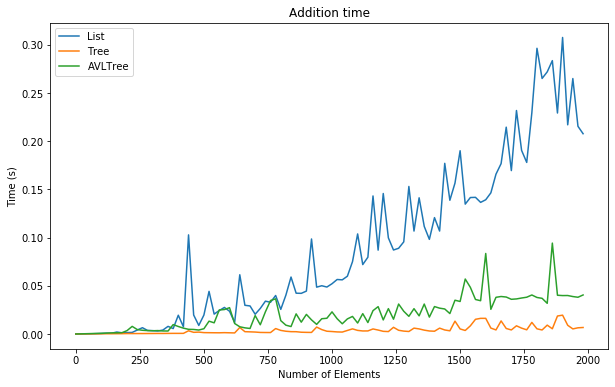

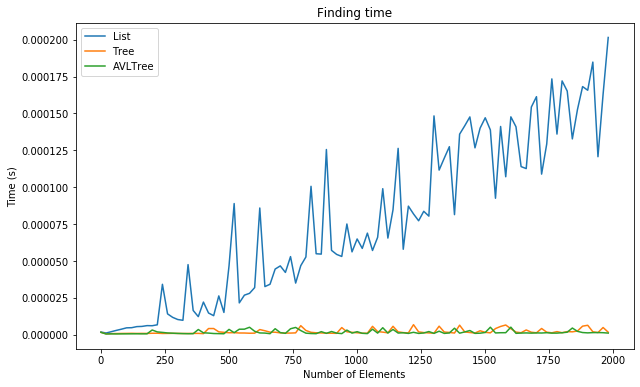

In [119]:
X,Y = prepare_test_dataset(2002,100)
perform_test_2([SortedList, Tree, AVLTree],X,Y,["List","Tree", "AVLTree"])

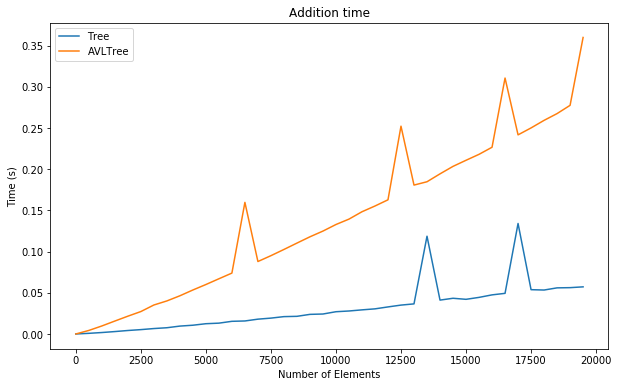

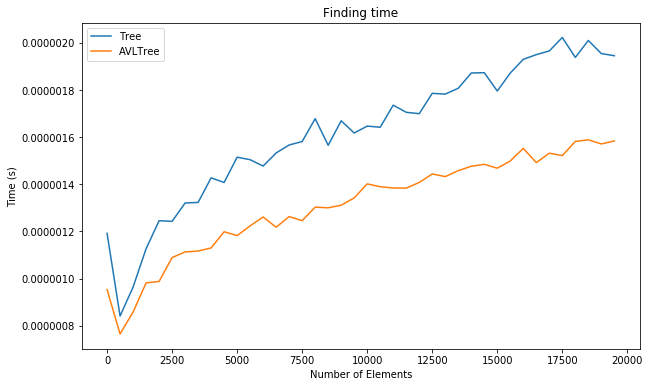

In [122]:
X,Y = prepare_test_dataset(40002,1000)
perform_test_2([Tree, AVLTree],X,Y,["Tree", "AVLTree"])

In [93]:
avl = AVLTree()
arr = [i for i in range(10000)]
random.shuffle(arr) 
test = [['BFzrYJMjkRZS', 'RdljwaqtWCgd', 1000000], ['XNbzCtCYSpCE', 'uHgwOXczRUdi', 1000001], ['jxrersMhuHnQ', 'XcpwmEMrQqjr', 1000002], ['XjRyVhXUUVDQ', 'cFSxMbcPqzzT', 1000003], ['TXhUtJAQBjGu', 'dQaLCuFXhtoX', 1000004], ['eakiCxlPJzJt', 'pJWFbQqMZcpc', 1000005], ['bjYLNknCKjRN', 'SqIigbyeaxsU', 1000006], ['QMTEHoqjyoiy', 'JlIAgqjWHgxf', 1000007], ['mgrSeSvAtwTG', 'HunEFUpIsTqh', 1000008], ['RbSPNsetPKZZ', 'VxjFNoHqOfmS', 1000009], ['KcxXpoqxnytO', 'kyXFbhQKcLtn', 1000010], ['CXNQoYEkxlwz', 'vQANruLNkcvv', 1000011], ['RVaQDONVGbNk', 'QbcVYbduifya', 1000012], ['soCJcSQzHFWt', 'EkCuungmaEGi', 1000013], ['uWnWoQpcaVXL', 'jDHtMyBcclrN', 1000014], ['GLlVHqnmwYRj', 'ViINCMdOUeNu', 1000015], ['OgcsFcAAyAMx', 'loufYQJKBVZa', 1000016], ['IiuvrKZwsyDG', 'sBaCNbnHOvAz', 1000017], ['BNEjiQjvfeWW', 'mchcRvSKKTzq', 1000018], ['fpkIbLDtqfOr', 'ZDPDziyLskVo', 1000019], ['hBdhAUxPzMAd', 'DkdtiYUEIUVE', 1000020], ['dGoXHPdwFSIV', 'HCfUkBYvVjxc', 1000021], ['IWasuWRceuLr', 'RXHFtyAtDPGe', 1000022], ['fPACdwvfdmfm', 'xTlBZcAZielg', 1000023]]
for t in test:
    avl.add(t)
avl.print_all()

GLlVHqnmwYRjViINCMdOUeNu1000015
left
-QMTEHoqjyoiyJlIAgqjWHgxf1000007
-left
---XjRyVhXUUVDQcFSxMbcPqzzT1000003
---left
-----XNbzCtCYSpCEuHgwOXczRUdi1000001
-----left
-------BFzrYJMjkRZSRdljwaqtWCgd1000000
-----right
-------jxrersMhuHnQXcpwmEMrQqjr1000002
---right
-----eakiCxlPJzJtpJWFbQqMZcpc1000005
-----left
-------TXhUtJAQBjGudQaLCuFXhtoX1000004
-----right
-------bjYLNknCKjRNSqIigbyeaxsU1000006
-right
---CXNQoYEkxlwzvQANruLNkcvv1000011
---left
-----RbSPNsetPKZZVxjFNoHqOfmS1000009
-----left
-------mgrSeSvAtwTGHunEFUpIsTqh1000008
-----right
-------KcxXpoqxnytOkyXFbhQKcLtn1000010
---right
-----soCJcSQzHFWtEkCuungmaEGi1000013
-----left
-------RVaQDONVGbNkQbcVYbduifya1000012
-----right
-------uWnWoQpcaVXLjDHtMyBcclrN1000014
right
-fpkIbLDtqfOrZDPDziyLskVo1000019
-left
---IiuvrKZwsyDGsBaCNbnHOvAz1000017
---left
-----OgcsFcAAyAMxloufYQJKBVZa1000016
---right
-----BNEjiQjvfeWWmchcRvSKKTzq1000018
-right
---dGoXHPdwFSIVHCfUkBYvVjxc1000021
---left
-----hBdhAUxPzMAdDkdtiYUEIUVE1000020
---right
--